# New York City - Hour Range

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
# Reading merged bike datas for 2018
chicago_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/nyc_merged_2018.csv")
# dc_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/dc_merged_2018.csv")
# nyc_2018 = pd.read_csv("./Resources/Bike_Data/Cleaned/nyc_merged_2018.csv")

In [28]:
chicago_2018.head()

,start_date,start_hour_range,start_station_name,trip_count,trip_duration_avg,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,01/01/2018,1am-6am,1 Ave & E 110 St,1,459,13,19,8,0.0,17.0,0.0
1,01/01/2018,1am-6am,1 Ave & E 16 St,9,228,13,19,8,0.0,17.0,0.0
2,01/01/2018,1am-6am,1 Ave & E 18 St,2,555,13,19,8,0.0,17.0,0.0
3,01/01/2018,1am-6am,1 Ave & E 30 St,1,800,13,19,8,0.0,17.0,0.0
4,01/01/2018,1am-6am,1 Ave & E 62 St,1,737,13,19,8,0.0,17.0,0.0


In [29]:
chicago_2018_gb = chicago_2018.groupby(["start_date", "start_hour_range"])
chicago_2018_agg =chicago_2018_gb.agg({"trip_count": "sum", "TAVG": "mean", "TMAX": "mean",
                                       "TMIN": "mean", "PRCP": "mean", "AWND": "mean", "SNWD": "mean"}) 
chicago_2018_agg.reset_index(level=["start_date", "start_hour_range"], inplace=True)
chicago_2018_agg.head()

,start_date,start_hour_range,trip_count,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,01/01/2018,10am-4pm,2792,13,19,8,0.0,17.0,0.0
1,01/01/2018,1am-6am,437,13,19,8,0.0,17.0,0.0
2,01/01/2018,5pm-7pm,1135,13,19,8,0.0,17.0,0.0
3,01/01/2018,7am-9am,346,13,19,8,0.0,17.0,0.0
4,01/01/2018,8pm_12am,790,13,19,8,0.0,17.0,0.0


In [30]:
chicago_2018_m = chicago_2018_agg.drop(["start_date", "trip_count"], axis=1)
chicago_2018_m.head()

,start_hour_range,TAVG,TMAX,TMIN,PRCP,AWND,SNWD
0,10am-4pm,13,19,8,0.0,17.0,0.0
1,1am-6am,13,19,8,0.0,17.0,0.0
2,5pm-7pm,13,19,8,0.0,17.0,0.0
3,7am-9am,13,19,8,0.0,17.0,0.0
4,8pm_12am,13,19,8,0.0,17.0,0.0


In [31]:
chicago_2018_X = pd.get_dummies(chicago_2018_m)
chicago_2018_X.columns

Index(['TAVG', 'TMAX', 'TMIN', 'PRCP', 'AWND', 'SNWD',
       'start_hour_range_10am-4pm', 'start_hour_range_1am-6am',
       'start_hour_range_5pm-7pm', 'start_hour_range_7am-9am',
       'start_hour_range_8pm_12am'],
      dtype='object')

In [32]:
chicago_2018_X.head()

,TAVG,TMAX,TMIN,PRCP,AWND,SNWD,start_hour_range_10am-4pm,start_hour_range_1am-6am,start_hour_range_5pm-7pm,start_hour_range_7am-9am,start_hour_range_8pm_12am
0,13,19,8,0.0,17.0,0.0,1,0,0,0,0
1,13,19,8,0.0,17.0,0.0,0,1,0,0,0
2,13,19,8,0.0,17.0,0.0,0,0,1,0,0
3,13,19,8,0.0,17.0,0.0,0,0,0,1,0
4,13,19,8,0.0,17.0,0.0,0,0,0,0,1


In [33]:
chicago_2018_Y = chicago_2018_agg["trip_count"].values.reshape(-1, 1)

In [34]:
print(chicago_2018_X.shape, chicago_2018_Y.shape)

(1824, 11) (1824, 1)


In [35]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split
X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(chicago_2018_X, chicago_2018_Y, random_state=42)


In [36]:
# Create a StandardScater model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler_chicago = StandardScaler().fit(X_train_ch)
y_scaler_chicago = StandardScaler().fit(y_train_ch)

In [37]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled_ch =  X_scaler_chicago.transform(X_train_ch)
X_test_scaled_ch = X_scaler_chicago.transform(X_test_ch)
y_train_scaled_ch = y_scaler_chicago.transform(y_train_ch)
y_test_scaled_ch = y_scaler_chicago.transform(y_test_ch)

In [38]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression

model_ch = LinearRegression()
model_ch.fit(X_train_scaled_ch, y_train_scaled_ch)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

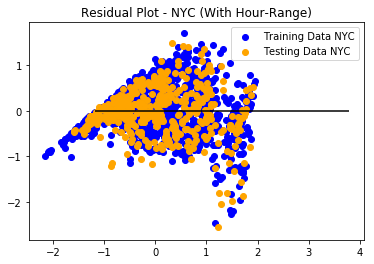

In [54]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions_ch = model_ch.predict(X_test_scaled_ch)
model_ch.fit(X_train_scaled_ch, y_train_scaled_ch)

plt.scatter(model_ch.predict(X_train_scaled_ch), model_ch.predict(X_train_scaled_ch) - y_train_scaled_ch, c="blue", label="Training Data NYC")
plt.scatter(model_ch.predict(X_test_scaled_ch), model_ch.predict(X_test_scaled_ch) - y_test_scaled_ch, c="orange", label="Testing Data NYC")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled_ch.min(), xmax=y_test_scaled_ch.max())
plt.title("Residual Plot - NYC (With Hour-Range)")

plt.savefig("residual_nyc_hr.png", bbox_inches="tight")

In [40]:
print('Weight coefficients: ', model_ch.coef_)
print('y-axis intercept: ', model_ch.intercept_) 

Weight coefficients:  [[-0.11542776  0.23868094  0.254997   -0.16397616 -0.00194334 -0.03917473
   0.47510676 -0.39272829  0.14074968 -0.03016749 -0.18195198]]
y-axis intercept:  [-7.72320546e-17]


In [50]:
print(f"True output: {y_test_scaled_ch[10]}")
print(f"Predicted output: {predictions_ch[10]}")
print(f"Prediction Error: {predictions_ch[10] - y_test_scaled_ch[10]}")
print(f"Prediction Error %: {(predictions_ch[10] - y_test_scaled_ch[10]) / y_test_scaled_ch[10] * 100}")

True output: [-0.8518579]
Predicted output: [-0.69116196]
Prediction Error: [0.16069594]
Prediction Error %: [-18.86417166]


In [49]:
print(f"True output: {y_test_scaled_ch[32]}")
print(f"Predicted output: {predictions_ch[32]}")
print(f"Prediction Error: {predictions_ch[32] - y_test_scaled_ch[32]}")
print(f"Prediction Error %: {(predictions_ch[32] - y_test_scaled_ch[32]) / y_test_scaled_ch[32] * 100}")

True output: [-1.1561797]
Predicted output: [-1.5906272]
Prediction Error: [-0.4344475]
Prediction Error %: [37.57612252]


In [52]:
print(f"True output: {y_test_scaled_ch[70]}")
print(f"Predicted output: {predictions_ch[70]}")
print(f"Prediction Error: {predictions_ch[70] - y_test_scaled_ch[70]}")
print(f"Prediction Error %: {(predictions_ch[70] - y_test_scaled_ch[70]) / y_test_scaled_ch[70] * 100}")

True output: [0.72254295]
Predicted output: [0.83094377]
Prediction Error: [0.10840081]
Prediction Error %: [15.00268097]


In [43]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted_ch = model_ch.predict(X_test_scaled_ch)

# Score the prediction with mse and r2
mse_ch = mean_squared_error(y_test_scaled_ch, predicted_ch)
r2_ch = r2_score(y_test_scaled_ch, predicted_ch)

print(f"Mean Squared Error (MSE) - NYC: {mse_ch}")
print(f"R-squared (R2 ) - NYC: {r2_ch}")

Mean Squared Error (MSE) - NYC: 0.2802843121958537
R-squared (R2 ) - NYC: 0.7280439357750887


In [44]:
model_ch.score(X_test_scaled_ch, y_test_scaled_ch)

0.7280439357750887

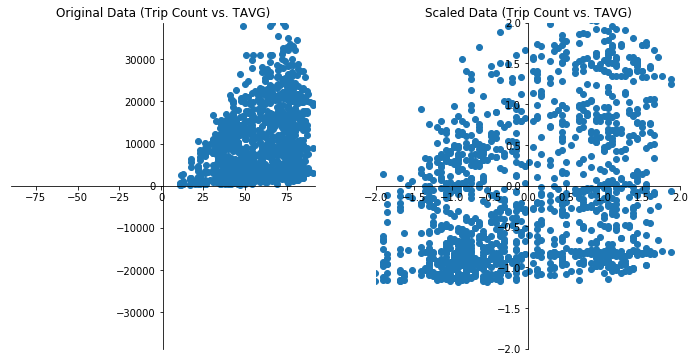

In [53]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data (Trip Count vs. TAVG)")
axes2.set_title("Scaled Data (Trip Count vs. TAVG)")

maxx = X_train_ch["TAVG"].max()
maxy = y_train_ch.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train_ch["TAVG"], y_train_ch)
axes2.scatter(X_train_scaled_ch[:,0], y_train_scaled_ch[:])

plt.savefig("scaled_nyc_hr.png", bbox_inches="tight")